## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [31]:
#Import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Load in your excel file and print out how many missing values are in each column

import os
os.getcwd()

df = pd.read_excel('realestate.xlsx')
df.isnull().sum()



No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [33]:
#Rename the relevant columns in your dataframe using this dictionart
#Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html


rename_dict = { 
    
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df.rename(columns = rename_dict, inplace= True) 
print(df)




      No  house_age distance_to_mrt  num_convenience_stores       lat  \
0      1       32.0      "84.87882"                   100.0  24.98298   
1      2       19.5      "306.5947"                     9.0  24.98034   
2      3       13.3      "561.9845"                     5.0  24.98746   
3      4       13.3      "561.9845"                     5.0  24.98746   
4      5        5.0      "390.5684"                     5.0  24.97937   
..   ...        ...             ...                     ...       ...   
409  410       13.7      "4082.015"                     0.0  24.94155   
410  411        5.6      "90.45606"                     9.0  24.97433   
411  412       18.8      "390.9696"                     7.0  24.97923   
412  413        8.1      "104.8101"                     5.0  24.96674   
413  414        6.5      "90.45606"                     9.0  24.97433   

          long  price_unit_area  
0    121.54024             37.9  
1    121.53951             42.2  
2    121.54391       

In [34]:
selected = ["lat", "long", "No"]

# Drop the above selected columns from your dataframe
#Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

df_drop = df.drop(selected, axis=1)

print(df_drop)

     house_age distance_to_mrt  num_convenience_stores  price_unit_area
0         32.0      "84.87882"                   100.0             37.9
1         19.5      "306.5947"                     9.0             42.2
2         13.3      "561.9845"                     5.0             47.3
3         13.3      "561.9845"                     5.0             54.8
4          5.0      "390.5684"                     5.0             43.1
..         ...             ...                     ...              ...
409       13.7      "4082.015"                     0.0             15.4
410        5.6      "90.45606"                     9.0             50.0
411       18.8      "390.9696"                     7.0             40.6
412        8.1      "104.8101"                     5.0             52.5
413        6.5      "90.45606"                     9.0             63.9

[414 rows x 4 columns]


In [35]:
#Remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

#Convert the "distance_to_mrt" column to the "float" datatype
#Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html


df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype(float)

df_drop["distance_to_mrt"]





0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    4082.01500
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: distance_to_mrt, Length: 414, dtype: float64

In [36]:
#Check current "shape" of dataframe
df_drop.shape

(414, 4)

In [37]:
#Remove missing values from this dataframe
...
#Check missing values in this dataframe
df_drop.isnull().sum()


#Remove rows with missing values from dataframe
df_drop = df_drop.dropna()


#Check shape again
df_drop.isnull().sum()   


house_age                 0
distance_to_mrt           0
num_convenience_stores    0
price_unit_area           0
dtype: int64

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [38]:
#Print out the summary statistics (mean, median, max, min, count) of all numeric columns
df_drop.describe()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
count,403.000000,403.000000,403.000000,403.000000
mean,18.607196,1070.118896,4.292804,38.106452
std,22.656541,1255.001088,5.636027,13.610588
min,0.000000,23.382840,-6.000000,7.600000
25%,8.700000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.600000
75%,28.300000,1442.932500,6.000000,46.600000
max,410.300000,6488.021000,100.000000,117.500000


In [39]:
#Minimum value for "num_convenience_stores" is -6
#Removing -6 convenience stores data point, is an error
#Documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing

df_dropstores = df_drop[df_drop["num_convenience_stores"] >= 0]
df_dropstores



,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,84.87882,100.0,37.9
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1
...,...,...,...,...
409,13.7,4082.01500,0.0,15.4
410,5.6,90.45606,9.0,50.0
411,18.8,390.96960,7.0,40.6
412,8.1,104.81010,5.0,52.5


In [40]:
#Maximum value for "num_convenience_stores" is 100
#This value does not show up in any other row and represents an extreme outlier
#Removing this value

df_dropstores2 = df_dropstores[df_dropstores["num_convenience_stores"] < 100]
df_dropstores2


,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1
5,7.1,2175.03000,3.0,32.1
...,...,...,...,...
409,13.7,4082.01500,0.0,15.4
410,5.6,90.45606,9.0,50.0
411,18.8,390.96960,7.0,40.6
412,8.1,104.81010,5.0,52.5


In [41]:
#Maximum "house_age" is 410.3 years old 
#Oldest house in Taiwan was built in the 17th century (300 years at most)
#Remove this value

df_drophouse = df_dropstores2[df_dropstores2["house_age"] < 300]
df_drophouse


,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
1,19.5,306.59470,9.0,42.2
2,13.3,561.98450,5.0,47.3
3,13.3,561.98450,5.0,54.8
4,5.0,390.56840,5.0,43.1
5,7.1,2175.03000,3.0,32.1
...,...,...,...,...
409,13.7,4082.01500,0.0,15.4
410,5.6,90.45606,9.0,50.0
411,18.8,390.96960,7.0,40.6
412,8.1,104.81010,5.0,52.5


In [42]:
df_new = df_drophouse

c:\Users\Uma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


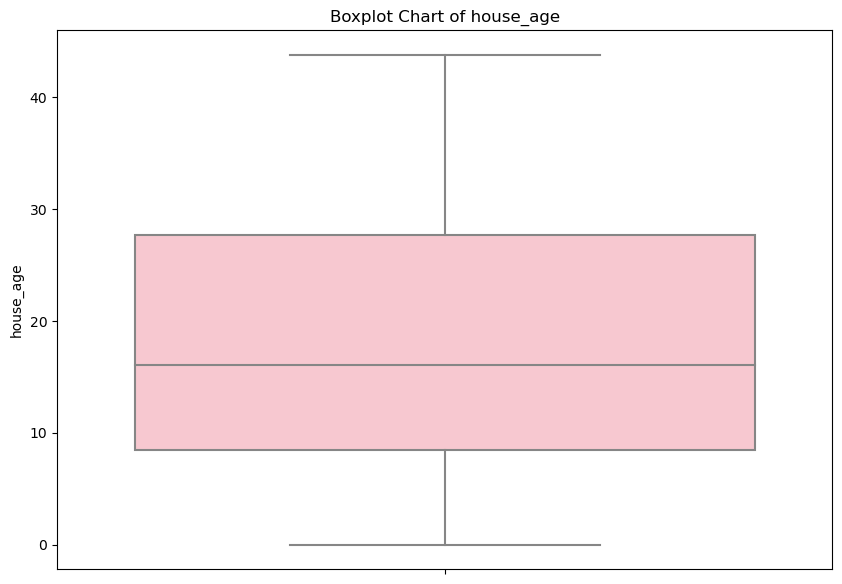

c:\Users\Uma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


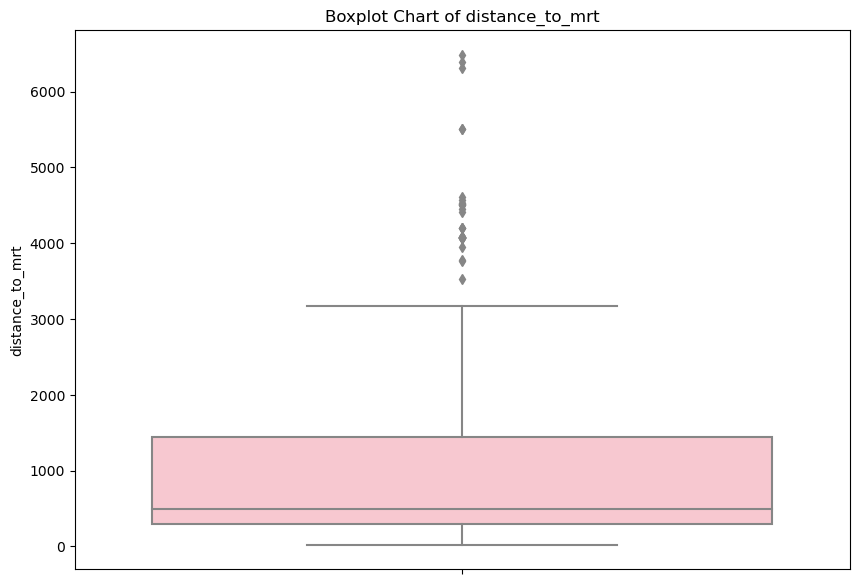

c:\Users\Uma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


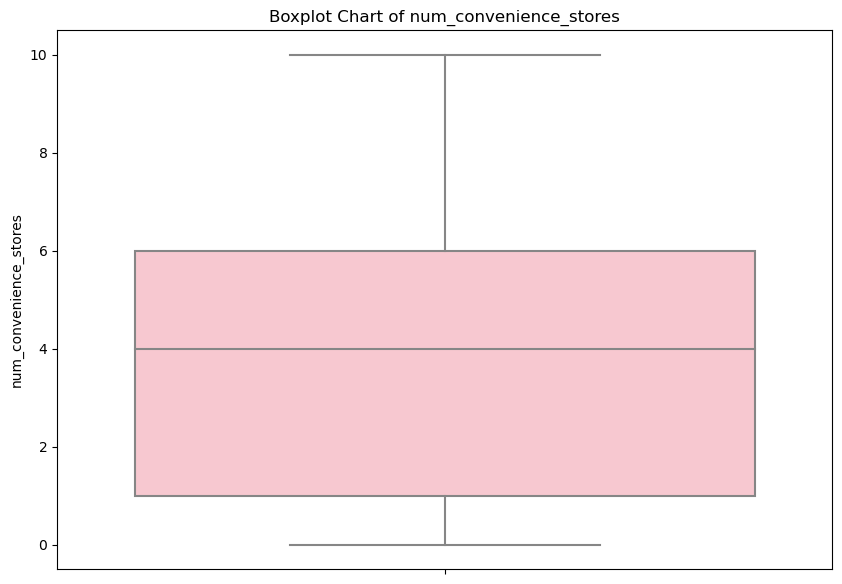

c:\Users\Uma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


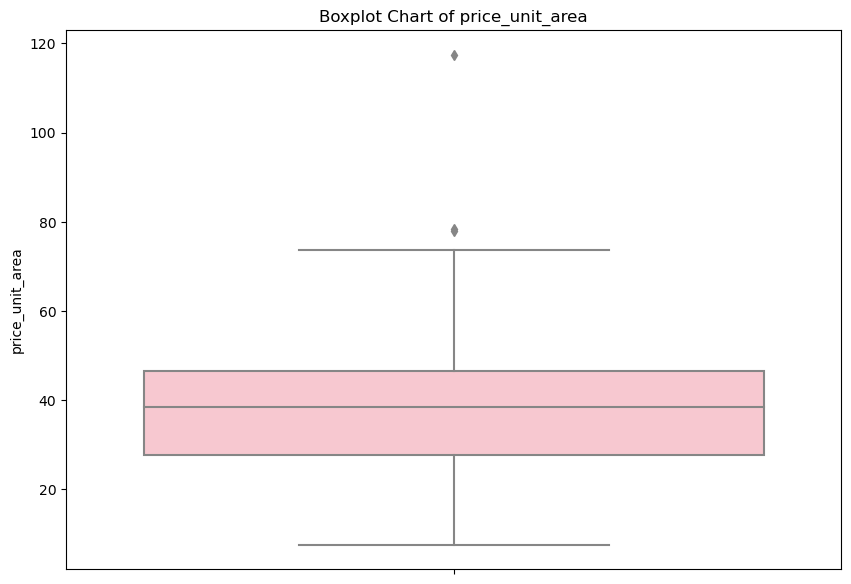

Text(0, 0.5, 'Frequency')

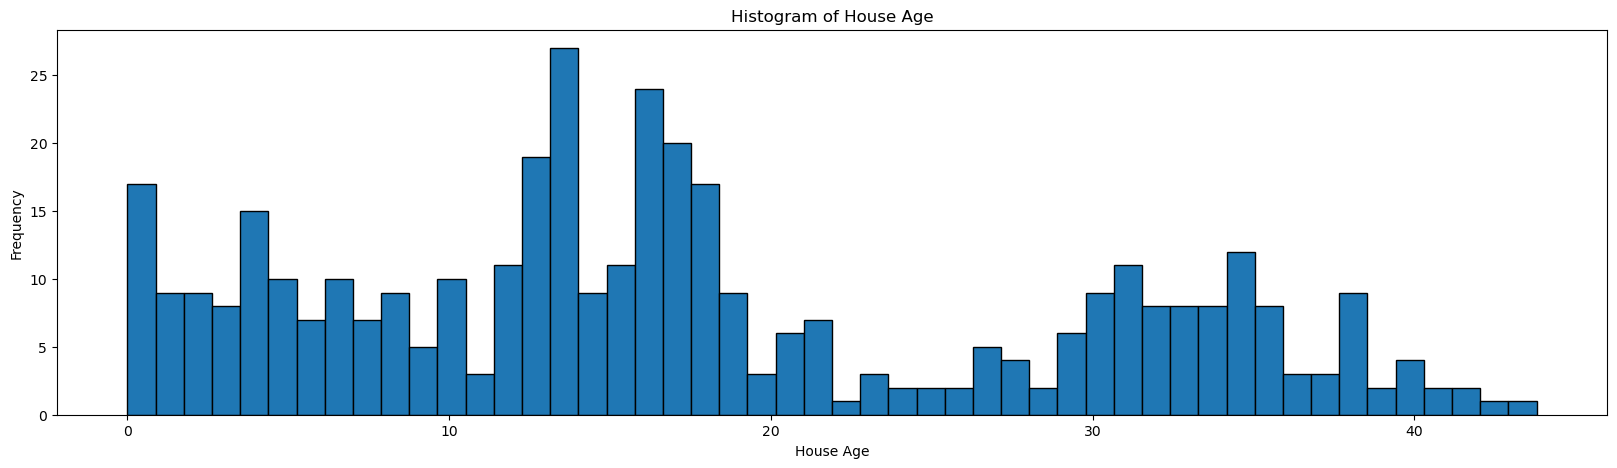

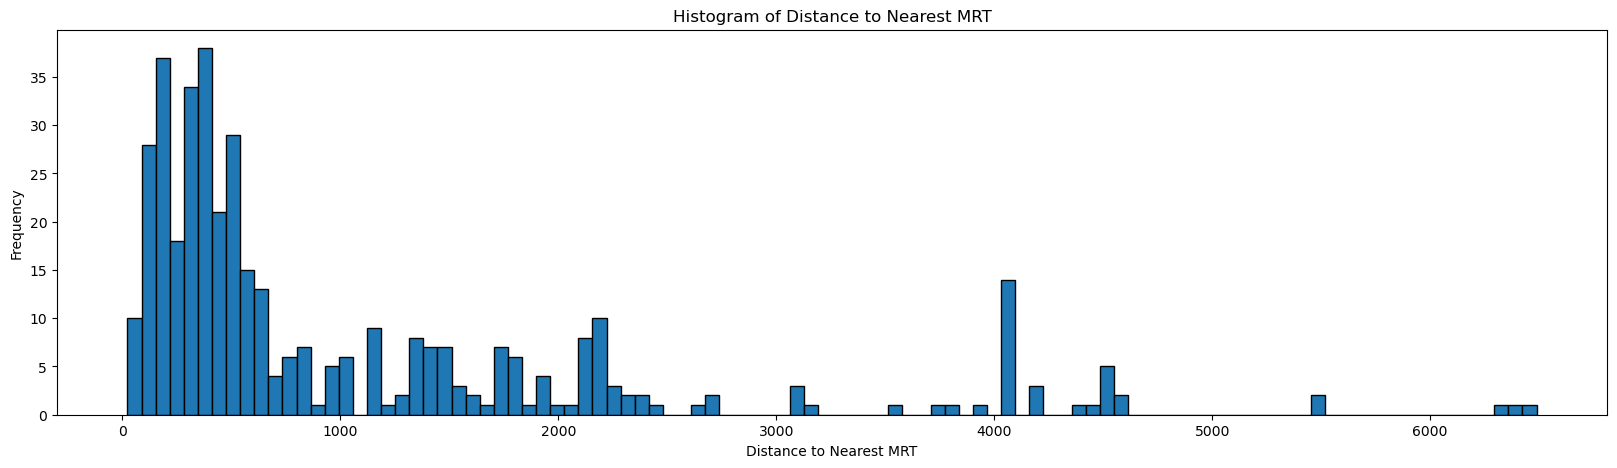

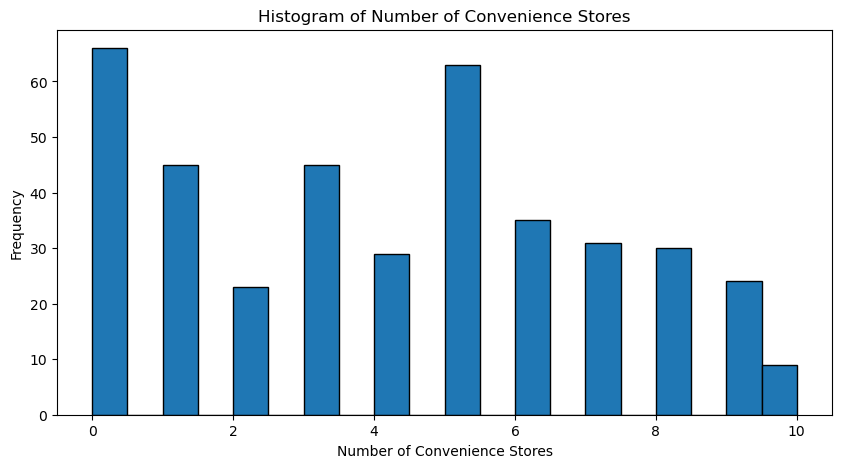

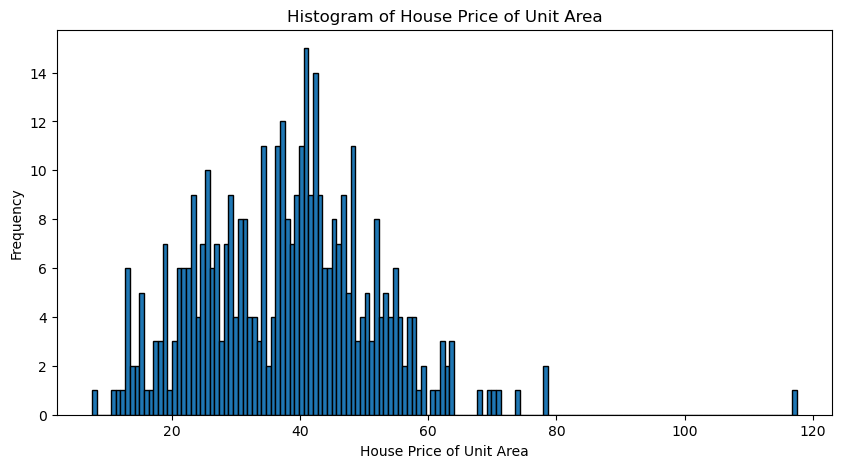

In [43]:
#Plot histograms, boxplots, and barcharts of all available numeric columns. 
#Create as many additional code blocks as needed to present your visualizations.
#Article: https://www.statology.org/univariate-analysis-in-python/ 


col = ['house_age','distance_to_mrt','num_convenience_stores','price_unit_area']

#BOXPLOT
for column in col:
    plt.figure(figsize=(10, 7)) 
    sns.boxplot(data=df_new, y=column, color='pink')
    plt.title(f'Boxplot Chart of {column}')
    plt.ylabel(column)

    plt.show()

#HISTOGRAM

#House age
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
df_new.hist(column='house_age', grid=False, edgecolor='black', ax = ax, bins = 50)
plt.xlabel('House Age')
plt.title('Histogram of House Age')
plt.ylabel('Frequency')


#Distance to nearest MRT
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
df_new.hist(column='distance_to_mrt', grid=False, edgecolor='black', ax = ax, bins = 100)
plt.xlabel('Distance to Nearest MRT')
plt.title('Histogram of Distance to Nearest MRT')
plt.ylabel('Frequency')


#Number of convenience stores
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
df_new.hist(column='num_convenience_stores', grid=False, edgecolor='black', ax = ax, bins = 20)
plt.xlabel('Number of Convenience Stores')
plt.title('Histogram of Number of Convenience Stores')
plt.ylabel('Frequency')



#House price of unit area
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
df_new.hist(column='price_unit_area', grid=False, edgecolor='black', ax = ax, bins = 150)
plt.xlabel('House Price of Unit Area')
plt.title('Histogram of House Price of Unit Area')
plt.ylabel('Frequency')



(-1.0, 20.0)

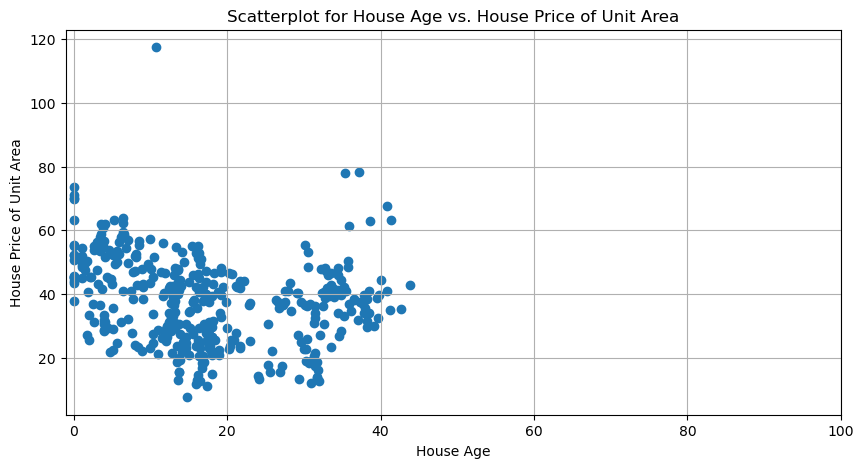

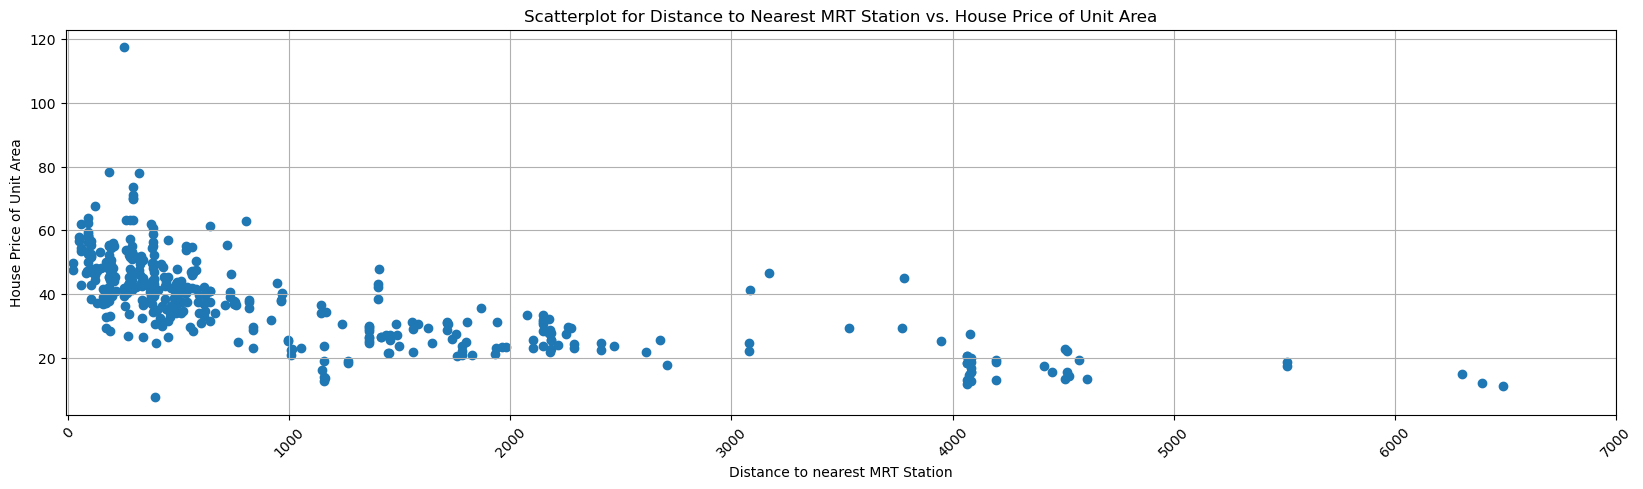

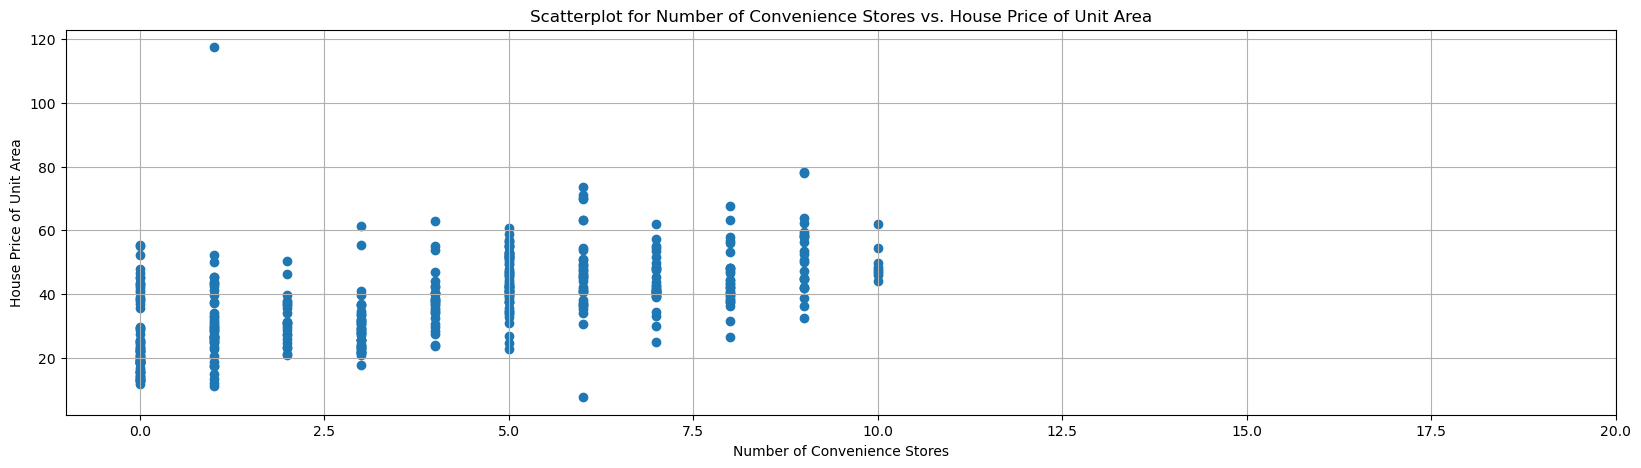

In [44]:
#Plot scatter-plots and other visualizations of all available numeric columns. 
#Article: https://www.statology.org/bivariate-analysis-in-python/

#Scatterplot of house age

#Scatterplot of house age
house_xaxis = df_new['house_age']
Y2 = df_new['price_unit_area']

plt.figure(figsize=(10, 5))
plt.scatter(house_xaxis, Y2)

plt.xlabel('House Age')
plt.ylabel('House Price of Unit Area')
plt.title(f'Scatterplot for House Age vs. House Price of Unit Area')

plt.grid(True)
plt.xlim(-1, 100)

#Scatterplot of distance to the nearest MRT station 

MRT_xaxis = df_new['distance_to_mrt']
Y2 = df_new['price_unit_area']

plt.figure(figsize=(20, 5))
plt.scatter(MRT_xaxis, Y2)

plt.xlabel('Distance to nearest MRT Station')
plt.ylabel('House Price of Unit Area')
plt.title(f'Scatterplot for Distance to Nearest MRT Station vs. House Price of Unit Area')

plt.grid(True)
plt.xticks(rotation= 45)
plt.xlim(-10, 7000)


#Scatterplot for number of convenience stores

stores_xaxis = df_new['num_convenience_stores']
Y2 = df_new['price_unit_area']

plt.figure(figsize=(20, 5))
plt.scatter(stores_xaxis, Y2)

plt.xlabel('Number of Convenience Stores')
plt.ylabel('House Price of Unit Area')
plt.title(f'Scatterplot for Number of Convenience Stores vs. House Price of Unit Area')

plt.grid(True)
plt.xlim(-1, 20)


In [45]:
#Saved transformed dataframe into `data/processed` for modeling

df_new.to_csv('cleaned_data.csv', index = False)
